In [2]:
import os 
import numpy as np
import networkx as nx
from util import plot_figure
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
color_list = sns.color_palette()
from util import compute_spectral_gap, creat_mixing_matrix

### Method 1: Weighted Matrix $\alpha W + (1-\alpha) W$

In [18]:
n = 5
W = creat_mixing_matrix(n, 'RingGraph', 0.5)
target_rho = compute_spectral_gap(W)

Ring Graph, spectral gap is: 0.010926199633097267


In [39]:
n = 50
alpha = 0.1
W = creat_mixing_matrix(n, 'RingGraph', 0.1) # last argument is self weight
W2 = (1 - alpha) * W + alpha * np.eye(n)
rho = compute_spectral_gap(W2)

Ring Graph, spectral gap is: 0.007096768816968302


### Method 2: using Star Graph

Using Metropolis-Hasting rule to generate a star graph with $n$ nodes.

In [14]:
def create_mixing_matrix_star_graph(n, adj_matrix):
    W = np.zeros((n, n)) #mixing matrix
    degree = np.sum(adj_matrix, axis=0) + 1
    for i in range(n):
        for j in range(n):
            if adj_matrix[i, j] == 1 and i != j:
                W[i, j] = min(1/degree[i], 1/degree[j])
    for i in range(n):
        W[i, i] = 1 - np.sum(W[i, :])
    return W

# def create_mixing_matrix_star_graph2(n, self_weight=0.1):
#     W = np.zeros((n, n)) #mixing matrix
#     W[0,0] = self_weight
#     for i in range(1, n):
#         W[0, i] = (1 - self_weight) / (n - 1)
#     for i in range(n):
#         W[i, i] = self_weight
#         W[i, 0] = 1- self_weight
#     return W

def is_doubly_stochastic(matrix):
    matrix = np.array(matrix)
    if np.any(matrix < 0):
        return False
    row_sums = np.sum(matrix, axis=1)
    col_sums = np.sum(matrix, axis=0)
    return np.allclose(row_sums, 1) and np.allclose(col_sums, 1)

5-agent Star Graph, spectral gap is: 0.19999999999999996
10-agent Star Graph, spectral gap is: 0.09999999999999964
15-agent Star Graph, spectral gap is: 0.06666666666666587
20-agent Star Graph, spectral gap is: (0.04999999999999949+0j)
25-agent Star Graph, spectral gap is: 0.03999999999999926
30-agent Star Graph, spectral gap is: (0.03333333333333288+0j)
35-agent Star Graph, spectral gap is: 0.028571428571426916
40-agent Star Graph, spectral gap is: 0.024999999999998024
45-agent Star Graph, spectral gap is: (0.022222222222221144+0j)
50-agent Star Graph, spectral gap is: 0.01999999999999824


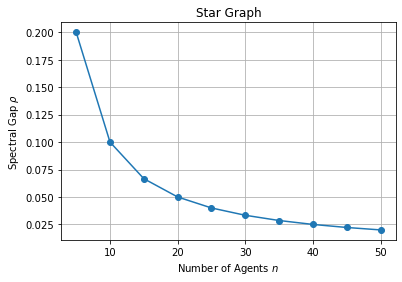

In [7]:
num_agent_list = list(range(5,55, 5))
spectral_gap_list = []
for n in num_agent_list:
    adj_matrix = np.zeros((n, n), dtype=int)
    for i in range(1, n):
        adj_matrix[0, i] = 1
        adj_matrix[i, 0] = 1

    W = create_mixing_matrix_star_graph(n, adj_matrix)
    if not is_doubly_stochastic(W):
        raise ValueError("W is not doubly stochastic")

    spectral_gap = compute_spectral_gap(W)
    if spectral_gap.imag == 0:
        spectral_gap_list.append(spectral_gap.real)
    else:
        ValueError("Spectral gap is not real")

    print(f'{n}-agent Star Graph, spectral gap is: {spectral_gap}' )

    filename = f's2_mixMat/MixingMat-StarGraph-NumAgent{n}.npy'
    np.save(filename, spectral_gap)


plt.plot(num_agent_list, spectral_gap_list, marker='o', color=color_list[0], label='Star Graph')
plt.title('Star Graph')
plt.xlabel(r'Number of Agents $n$')
plt.ylabel(r'Spectral Gap $\rho$')
plt.grid()

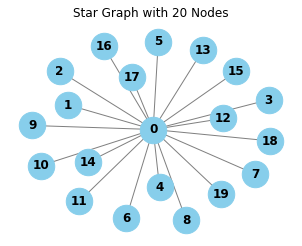

In [20]:
n = 20
adj_matrix = np.zeros((n, n), dtype=int)
for i in range(1, n):
    adj_matrix[0, i] = 1
    adj_matrix[i, 0] = 1
W = create_mixing_matrix_star_graph(n, adj_matrix)
adj_matrix = np.copy(W)
np.fill_diagonal(adj_matrix, 0) # 设置对角线元素为0，去除自环
adj_matrix[adj_matrix > 0] = 1 # 将非零元素转换为1（表示存在边）

G = nx.from_numpy_array(adj_matrix)
pos = nx.spring_layout(G)  # 选择布局算法
plt.figure(figsize=(4, 3))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_weight='bold')
plt.title(f"Star Graph with {n} Nodes")
plt.show()

In [21]:
for rank in range(n):
    print(np.where(W[rank] > 0)[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0 1]
[0 2]
[0 3]
[0 4]
[0 5]
[0 6]
[0 7]
[0 8]
[0 9]
[ 0 10]
[ 0 11]
[ 0 12]
[ 0 13]
[ 0 14]
[ 0 15]
[ 0 16]
[ 0 17]
[ 0 18]
[ 0 19]
